Concrete Strength Prediction Using Neural Networks

- Importa el csv desde drive
- Analiza los datos
- add the new feature to the dataframe
I want to add another feature to this dataset. The feauture is the ratio of water to cement and it is often used by engineers to estimate concrete strength. I'll call this feature 'WC Ratio'
- ¿Cuántas filas y columnas tiene?
- ¿Falta algún dato?
# check out the descriptive statistics of the dataset
# visualize the distribution of the features
Use the Keras library to build a neural network with the following:

One hidden layer with 10 nodes, and a ReLU activation function
Use the ADAM optimizer and the mean squared error as the loss function

Ahora normaliza los datos y haz de nuevo la red
#normalize the predictor variables by subtracting the mean and dividing by standard deviation

Aumento el número de capas

dibuja como mejora la perdida




https://github.com/mikeg5/concrete-strength-prediction-keras-NN/blob/master/concrete-strength-prediction-NN.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PIA23-24/tema3/simulacroparcial/data.csv')

In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df['Wc ratio'] = df['Water']/df['Cement']

In [ ]:
df['Wc ratio']

0       0.300000
1       0.300000
2       0.685714
3       0.685714
4       0.966767
          ...   
1025    0.649783
1026    0.608318
1027    1.297643
1028    1.103708
1029    0.768877
Name: Wc ratio, Length: 1030, dtype: float64

In [ ]:
df.shape

(1030, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Strength', 1)
X_train, X_test, y_train, y_test = train_test_split(X, df['Strength'], test_size = 0.2)

<ipython-input-11-9b7042696312>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Strength', 1)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [1]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.summary()

NameError: ignored

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=['mae', 'mse'])
hist1 = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
26/26 [==============================] - 4s 12ms/step - loss: 72.4499 - mae: 6.7141 - mse: 72.4499
Epoch 2/200
26/26 [==============================] - 0s 7ms/step - loss: 55.6019 - mae: 5.7640 - mse: 55.6019
Epoch 3/200
26/26 [==============================] - 0s 8ms/step - loss: 60.7234 - mae: 6.0032 - mse: 60.7234
Epoch 4/200
26/26 [==============================] - 0s 10ms/step - loss: 54.4057 - mae: 5.6847 - mse: 54.4057
Epoch 5/200
26/26 [==============================] - 0s 6ms/step - loss: 56.6544 - mae: 5.8353 - mse: 56.6544
Epoch 6/200
26/26 [==============================] - 0s 8ms/step - loss: 55.4286 - mae: 5.7720 - mse: 55.4286
Epoch 7/200
26/26 [==============================] - 0s 10ms/step - loss: 57.6530 - mae: 5.8854 - mse: 57.6530
Epoch 8/200
26/26 [==============================] - 0s 12ms/step - loss: 55.8099 - mae: 5.7729 - mse: 55.8099
Epoch 9/200
26/26 [==============================] - 0s 9ms/step - loss: 56.6918 - mae: 5.7625 - mse: 56.6918
Epoch 

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 76.7739 - mae: 7.0665 - mse: 76.7739


[76.77388000488281, 7.066481590270996, 76.77388000488281]

In [ ]:
modelNorm = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])
modelNorm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                200       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 651 (2.54 KB)
Trainable params: 651 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelNorm.compile(optimizer="adam", loss="mse", metrics=['mse', 'mae'])
hist2 = modelNorm.fit(X_train_norm, y_train, epochs=200)

Epoch 1/200
26/26 [==============================] - 1s 2ms/step - loss: 24.3476 - mse: 24.3476 - mae: 3.6614
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 24.0485 - mse: 24.0485 - mae: 3.6320
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 23.6484 - mse: 23.6484 - mae: 3.5932
Epoch 4/200
26/26 [==============================] - 0s 3ms/step - loss: 23.6991 - mse: 23.6991 - mae: 3.6151
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 23.6234 - mse: 23.6234 - mae: 3.5900
Epoch 6/200
26/26 [==============================] - 0s 3ms/step - loss: 23.7211 - mse: 23.7211 - mae: 3.6079
Epoch 7/200
26/26 [==============================] - 0s 3ms/step - loss: 23.4327 - mse: 23.4327 - mae: 3.5603
Epoch 8/200
26/26 [==============================] - 0s 3ms/step - loss: 23.6358 - mse: 23.6358 - mae: 3.5968
Epoch 9/200
26/26 [==============================] - 0s 3ms/step - loss: 23.4677 - mse: 23.4677 - mae: 3.5930
Epoch 10/2

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 76.7739 - mae: 7.0665 - mse: 76.7739


[76.77388000488281, 7.066481590270996, 76.77388000488281]

In [ ]:
hist.history

{'loss': [1592.9168701171875,
  1566.4573974609375,
  1514.901123046875,
  1404.89794921875,
  1195.5980224609375,
  859.3640747070312,
  483.49072265625,
  269.9836730957031,
  211.83114624023438,
  186.4029998779297,
  173.6448974609375,
  164.38787841796875,
  156.5974884033203,
  151.13272094726562,
  146.4433135986328,
  142.68312072753906,
  139.42001342773438,
  136.12533569335938,
  133.88790893554688,
  130.6382293701172,
  128.031005859375,
  125.60088348388672,
  122.61327362060547,
  120.89461517333984,
  117.6048812866211,
  115.10281372070312,
  112.3276138305664,
  109.90985870361328,
  106.67737579345703,
  104.35487365722656,
  101.60301971435547,
  98.56219482421875,
  95.34059143066406,
  93.10189056396484,
  89.9264144897461,
  87.21589660644531,
  84.78614044189453,
  82.14569091796875,
  79.63632202148438,
  77.3580551147461,
  74.75648498535156,
  72.40797424316406,
  70.01451873779297,
  68.24618530273438,
  66.47432708740234,
  64.5450668334961,
  62.5722007751

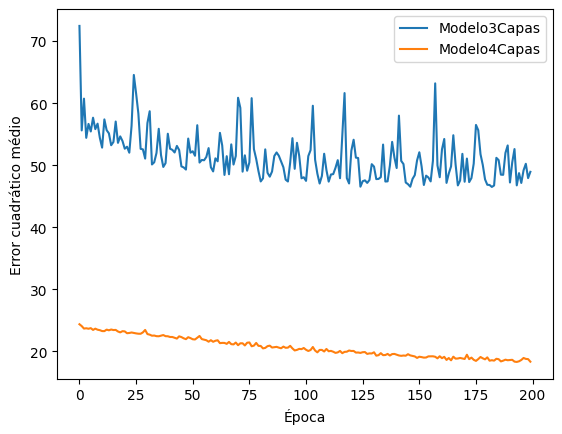

In [ ]:
def plot_history():
    plt.plot(hist1.history['loss'], label="Modelo3Capas")
    plt.plot(hist2.history['loss'], label="Modelo4Capas")
    plt.ylabel('Error cuadrático médio')
    plt.xlabel('Época')
    plt.legend(loc="upper right")

plot_history()